# 4.10B Final Project

01. Importing Libraries
02. Importing Dataframes
03. Customer Profiling
04. Visualizations: Customer Profile Distributions
05. Aggregate Statistics
06. Comparing Customer Profiles to Regions and Departments
07. Customer Behavior Analysis

# 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 2. Importing Dataframes

In [2]:
# Define path
path = r'C:\Users\Lex\OneDrive\Data Analytics\Data Immersion - Python\03-2022 Instacart Basket Analysis'

In [3]:
# Import most recent Instacart dataframe as df
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_dataframe_v2.pkl'))

In [4]:
# Import departments dataframe
df_dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

# 3. Customer Profiling

In [5]:
# Resetting column display
pd.options.display.max_columns = None

## Creating income_range flag

In [6]:
# Names reflect income relative to the data set, not actual wealth.
df.loc[df['income'] <= 50000, 'income_range'] = 'Low income'
df.loc[(df['income'] > 50000) & (df['income'] <= 120000), 'income_range'] = 'Middle income'
df.loc[df['income'] >= 120000, 'income_range'] = 'High income'

In [7]:
df['income_range'].value_counts()

Middle income    18438753
High income       9183640
Low income        3366219
Name: income_range, dtype: int64

## Creating customer_profile variable

In [8]:
# Single Adult (Young)
df.loc[(df['fam_status'] == 'single') & (df['Age'] <= 21) & (df['n_dependants'] == 0), 'customer_profile'] = 'Single Adult (Young)'

In [9]:
# Single Adult
df.loc[(df['fam_status'] == 'single') & (df['Age'] > 21) & (df['Age'] <= 60) & (df['n_dependants'] == 0), 'customer_profile'] = 'Single Adult'

In [10]:
# Single Parent (Young) (Single parents are *only* <21 in this data set)
df.loc[(df['fam_status'] == 'living with parents and siblings') & (df['Age'] <= 21) & (df['n_dependants'] >= 1), 'customer_profile'] = 'Single Parent (Young)'

In [11]:
# Married Parent (There are no married >21 adults *without* dependents in this data set)
df.loc[(df['fam_status'] == 'married') & (df['Age'] > 21) & (df['Age'] <= 60) & (df['n_dependants'] >= 1), 'customer_profile'] = 'Married Parent'

In [12]:
# Married Parent (Elder)
df.loc[(df['fam_status'] == 'married') & (df['Age'] > 60) & (df['n_dependants'] >= 1), 'customer_profile'] = 'Married Parent (Elder)'

In [13]:
# Divorcee (Elder) (Divorcees are *only* >60 in this data set)
df.loc[(df['fam_status'] == 'divorced/widowed'), 'customer_profile'] = 'Divorcee (Elder)'

In [14]:
# The numbers of edge cases in this data set are staggeringly few.
df['customer_profile'].value_counts(dropna=False)

Married Parent            14174982
Married Parent (Elder)     7585092
Single Adult               4635696
Divorcee (Elder)           2647359
Single Parent (Young)      1482528
Single Adult (Young)        462955
Name: customer_profile, dtype: int64

In [15]:
df.shape

(30988612, 31)

In [16]:
# Checking that customer_profile accounts for every customer
df['customer_profile'].value_counts().sum()

30988612

## Creating second 'shopper_profile' variable

In [17]:
# Locating how many orders in the data set were made between 9am - 5pm (not incl. 5pm), the most popular 8 hours.
df.loc[df['order_hour_of_day'].isin(range(9,17))]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,loyalty_flag,spending_flag,frequency_flag,Gender,State,Age,date_joined,n_dependants,fam_status,income,max_order,Region,income_range,customer_profile
11,473747,1,3,3,12,21.0,False,196,1,1,Soda,77.0,7.0,9.0,Mid-range product,Slowest days,Most orders,New customer,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,10,South,Low income,Married Parent
12,473747,1,3,3,12,21.0,False,12427,2,1,Original Beef Jerky,23.0,19.0,4.4,Low-range product,Slowest days,Most orders,New customer,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,10,South,Low income,Married Parent
13,473747,1,3,3,12,21.0,False,10258,3,1,Pistachios,117.0,19.0,3.0,Low-range product,Slowest days,Most orders,New customer,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,10,South,Low income,Married Parent
14,473747,1,3,3,12,21.0,False,25133,4,0,Organic String Cheese,21.0,16.0,8.6,Mid-range product,Slowest days,Most orders,New customer,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,10,South,Low income,Married Parent
15,473747,1,3,3,12,21.0,False,30450,5,0,Creamy Almond Butter,88.0,13.0,3.2,Low-range product,Slowest days,Most orders,New customer,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,10,South,Low income,Married Parent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32429927,2977660,206209,13,1,12,7.0,False,14197,5,1,Tomato Paste,9.0,9.0,5.6,Mid-range product,Busiest days,Most orders,Regular customer,Low spender,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,13,Midwest,High income,Married Parent (Elder)
32429928,2977660,206209,13,1,12,7.0,False,38730,6,0,Brownie Crunch High Protein Bar,3.0,19.0,5.9,Mid-range product,Busiest days,Most orders,Regular customer,Low spender,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,13,Midwest,High income,Married Parent (Elder)
32429929,2977660,206209,13,1,12,7.0,False,31477,7,0,High Protein Bar Chunky Peanut Butter,3.0,19.0,4.2,Low-range product,Busiest days,Most orders,Regular customer,Low spender,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,13,Midwest,High income,Married Parent (Elder)
32429930,2977660,206209,13,1,12,7.0,False,6567,8,0,Chocolate Peanut Butter Protein Bar,3.0,19.0,4.9,Low-range product,Busiest days,Most orders,Regular customer,Low spender,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,13,Midwest,High income,Married Parent (Elder)


In [18]:
df.shape

(30988612, 31)

In [19]:
# ~65% of orders are made between 9am-5pm. One third of the day accounts for nearly two thirds of all orders.
20196607/30988612

0.6517428725107146

In [20]:
# Locating how many orders in the data set were made on weekends
df.loc[df['orders_day_of_week'].isin(range(0,2))]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,loyalty_flag,spending_flag,frequency_flag,Gender,State,Age,date_joined,n_dependants,fam_status,income,max_order,Region,income_range,customer_profile
33,550135,1,7,1,9,20.0,False,196,1,1,Soda,77.0,7.0,9.0,Mid-range product,Busiest days,Most orders,New customer,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,10,South,Low income,Married Parent
34,550135,1,7,1,9,20.0,False,10258,2,1,Pistachios,117.0,19.0,3.0,Low-range product,Busiest days,Most orders,New customer,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,10,South,Low income,Married Parent
35,550135,1,7,1,9,20.0,False,12427,3,1,Original Beef Jerky,23.0,19.0,4.4,Low-range product,Busiest days,Most orders,New customer,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,10,South,Low income,Married Parent
36,550135,1,7,1,9,20.0,False,25133,4,1,Organic String Cheese,21.0,16.0,8.6,Mid-range product,Busiest days,Most orders,New customer,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,10,South,Low income,Married Parent
37,550135,1,7,1,9,20.0,False,13032,5,1,Cinnamon Toast Crunch,121.0,14.0,4.0,Low-range product,Busiest days,Most orders,New customer,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,10,South,Low income,Married Parent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32429927,2977660,206209,13,1,12,7.0,False,14197,5,1,Tomato Paste,9.0,9.0,5.6,Mid-range product,Busiest days,Most orders,Regular customer,Low spender,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,13,Midwest,High income,Married Parent (Elder)
32429928,2977660,206209,13,1,12,7.0,False,38730,6,0,Brownie Crunch High Protein Bar,3.0,19.0,5.9,Mid-range product,Busiest days,Most orders,Regular customer,Low spender,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,13,Midwest,High income,Married Parent (Elder)
32429929,2977660,206209,13,1,12,7.0,False,31477,7,0,High Protein Bar Chunky Peanut Butter,3.0,19.0,4.2,Low-range product,Busiest days,Most orders,Regular customer,Low spender,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,13,Midwest,High income,Married Parent (Elder)
32429930,2977660,206209,13,1,12,7.0,False,6567,8,0,Chocolate Peanut Butter Protein Bar,3.0,19.0,4.9,Low-range product,Busiest days,Most orders,Regular customer,Low spender,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,13,Midwest,High income,Married Parent (Elder)


In [21]:
# ~36.5% of orders were made on weekends, which only account for 28.5% (2/7) of the week. 
# A disproportionate amount of orders are made on weekends.
11329459/30988612

0.36560072455003795

In [22]:
# Taking steps to create peak_flag column, one of two parts to the final shopper_profile variable.
# 0 = Off-Peak, 100 = Peak
df.loc[df['order_hour_of_day'].isin(range(9,17)), 'order_time_index'] = 100

In [23]:
df.loc[df['order_hour_of_day'].isin(range(17,24)), 'order_time_index'] = 0

In [24]:
df.loc[df['order_hour_of_day'].isin(range(0,9)), 'order_time_index'] = 0

In [25]:
df['order_time_index'].value_counts()

100.0    20196607
0.0      10792005
Name: order_time_index, dtype: int64

In [26]:
df['order_time_mean'] = df.groupby('user_id')['order_time_index'].transform(np.mean)

In [27]:
# Creating peak_flag column
df.loc[df['order_time_mean'] >= 50, 'peak_flag'] = 'Peak shopper'

In [28]:
df.loc[df['order_time_mean'] < 50, 'peak_flag'] = 'Off-Peak shopper'

In [29]:
df['peak_flag'].value_counts()

Peak shopper        24143771
Off-Peak shopper     6844841
Name: peak_flag, dtype: int64

In [30]:
# Checking to make sure there are 'edge cases.' Ex: an off-peak shopper doesn't only shop during off-peak hours.
df.loc[(df['order_time_index'] == 100) & (df['peak_flag'] == 'Off-Peak shopper')]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,loyalty_flag,spending_flag,frequency_flag,Gender,State,Age,date_joined,n_dependants,fam_status,income,max_order,Region,income_range,customer_profile,order_time_index,order_time_mean,peak_flag
1053,2618231,13,1,6,12,NaN,True,32850,1,0,Organic Pumpkin Puree,17.0,13.0,2.5,Low-range product,Regularly busy,Most orders,Regular customer,Low spender,Frequent customer,Male,Idaho,51,6/8/2018,2,married,106926,12,West,Middle income,Married Parent,100.0,44.444444,Off-Peak shopper
1054,2618231,13,1,6,12,NaN,True,44142,2,0,Red Onion,83.0,4.0,7.0,Mid-range product,Regularly busy,Most orders,Regular customer,Low spender,Frequent customer,Male,Idaho,51,6/8/2018,2,married,106926,12,West,Middle income,Married Parent,100.0,44.444444,Off-Peak shopper
1055,2618231,13,1,6,12,NaN,True,32446,3,0,Bunched Carrots,83.0,4.0,2.9,Low-range product,Regularly busy,Most orders,Regular customer,Low spender,Frequent customer,Male,Idaho,51,6/8/2018,2,married,106926,12,West,Middle income,Married Parent,100.0,44.444444,Off-Peak shopper
1056,2618231,13,1,6,12,NaN,True,4210,4,0,Whole Milk,84.0,16.0,13.5,Mid-range product,Regularly busy,Most orders,Regular customer,Low spender,Frequent customer,Male,Idaho,51,6/8/2018,2,married,106926,12,West,Middle income,Married Parent,100.0,44.444444,Off-Peak shopper
1057,2618231,13,1,6,12,NaN,True,27086,5,0,Half & Half,53.0,16.0,11.4,Mid-range product,Regularly busy,Most orders,Regular customer,Low spender,Frequent customer,Male,Idaho,51,6/8/2018,2,married,106926,12,West,Middle income,Married Parent,100.0,44.444444,Off-Peak shopper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32428898,2986341,206206,66,3,9,14.0,False,45139,2,1,Honey Mustard Avocado Oil Dressing,89.0,13.0,5.7,Mid-range product,Slowest days,Most orders,Loyal customer,Low spender,Frequent customer,Female,Idaho,25,2/11/2018,2,married,75041,67,West,Middle income,Married Parent,100.0,35.438596,Off-Peak shopper
32428899,2986341,206206,66,3,9,14.0,False,21850,3,0,Waffle Cut Sweet Potato Seasoned Fries,129.0,1.0,14.5,Mid-range product,Slowest days,Most orders,Loyal customer,Low spender,Frequent customer,Female,Idaho,25,2/11/2018,2,married,75041,67,West,Middle income,Married Parent,100.0,35.438596,Off-Peak shopper
32428900,1904200,206206,67,0,13,11.0,False,11520,1,1,Large Alfresco Eggs,86.0,16.0,3.1,Low-range product,Busiest days,Most orders,Loyal customer,Low spender,Frequent customer,Female,Idaho,25,2/11/2018,2,married,75041,67,West,Middle income,Married Parent,100.0,35.438596,Off-Peak shopper
32428901,1904200,206206,67,0,13,11.0,False,23029,2,1,Organic Uncured Sliced Black Forest Ham,96.0,20.0,8.0,Mid-range product,Busiest days,Most orders,Loyal customer,Low spender,Frequent customer,Female,Idaho,25,2/11/2018,2,married,75041,67,West,Middle income,Married Parent,100.0,35.438596,Off-Peak shopper


In [31]:
# Checking 2
df.loc[(df['order_time_index'] == 0) & (df['peak_flag'] == 'Peak shopper')]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,loyalty_flag,spending_flag,frequency_flag,Gender,State,Age,date_joined,n_dependants,fam_status,income,max_order,Region,income_range,customer_profile,order_time_index,order_time_mean,peak_flag
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77.0,7.0,9.0,Mid-range product,Regularly busy,Average orders,New customer,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,10,South,Low income,Married Parent,0.0,50.847458,Peak shopper
1,2539329,1,1,2,8,NaN,True,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,12.5,Mid-range product,Regularly busy,Average orders,New customer,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,10,South,Low income,Married Parent,0.0,50.847458,Peak shopper
2,2539329,1,1,2,8,NaN,True,12427,3,0,Original Beef Jerky,23.0,19.0,4.4,Low-range product,Regularly busy,Average orders,New customer,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,10,South,Low income,Married Parent,0.0,50.847458,Peak shopper
3,2539329,1,1,2,8,NaN,True,26088,4,0,Aged White Cheddar Popcorn,23.0,19.0,4.7,Low-range product,Regularly busy,Average orders,New customer,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,10,South,Low income,Married Parent,0.0,50.847458,Peak shopper
4,2539329,1,1,2,8,NaN,True,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,1.0,Low-range product,Regularly busy,Average orders,New customer,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,10,South,Low income,Married Parent,0.0,50.847458,Peak shopper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32429890,2266710,206209,10,5,18,29.0,False,41213,5,1,French Loaf,112.0,3.0,4.8,Low-range product,Regularly busy,Average orders,Regular customer,Low spender,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,13,Midwest,High income,Married Parent (Elder),0.0,76.744186,Peak shopper
32429891,2266710,206209,10,5,18,29.0,False,23800,6,0,Whole Grain Cereal,121.0,14.0,6.2,Mid-range product,Regularly busy,Average orders,Regular customer,Low spender,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,13,Midwest,High income,Married Parent (Elder),0.0,76.744186,Peak shopper
32429892,2266710,206209,10,5,18,29.0,False,24852,7,0,Banana,24.0,4.0,12.3,Mid-range product,Regularly busy,Average orders,Regular customer,Low spender,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,13,Midwest,High income,Married Parent (Elder),0.0,76.744186,Peak shopper
32429893,2266710,206209,10,5,18,29.0,False,13838,8,0,Natural Free & Clear Dish Liquid,74.0,17.0,3.8,Low-range product,Regularly busy,Average orders,Regular customer,Low spender,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,13,Midwest,High income,Married Parent (Elder),0.0,76.744186,Peak shopper


In [32]:
# Taking steps to create day_flag column, the second of two parts to the final shopper_profile variable.
# 0 = weekend, 100 = weekday
df.loc[df['orders_day_of_week'].isin(range(0,2)), 'order_day_index'] = 0

In [33]:
df.loc[df['orders_day_of_week'].isin(range(2,7)), 'order_day_index'] = 100

In [34]:
df['order_day_index'].value_counts(dropna = False)

100.0    19659153
0.0      11329459
Name: order_day_index, dtype: int64

In [35]:
df['order_day_mean'] = df.groupby('user_id')['order_day_index'].transform(np.mean)

In [36]:
df[['user_id', 'order_day_mean']]

,user_id,order_day_mean
0,1,71.186441
1,1,71.186441
2,1,71.186441
3,1,71.186441
4,1,71.186441
...,...,...
32429927,206209,63.565891
32429928,206209,63.565891
32429929,206209,63.565891
32429930,206209,63.565891


In [37]:
# Calculating day_flag with regard to the fact that there are 7 days in a week.
# If a user made 1 order each day of the week, their order_day_mean would be ~71.43. (This is also 100% - 28.57% = 71.43%)
# If a disproportionate amount of user's orders were made on a weekday
df.loc[df['order_day_mean'] >= 71.43, 'day_flag'] = 'Weekday shopper'

In [38]:
# If a disproportionate amount of user's orders were made on a weekend
df.loc[df['order_day_mean'] < 71.43, 'day_flag'] = 'Weekend shopper'

In [39]:
# Almost 2/3 of users shop more on the weekends than weekdays.
df['day_flag'].value_counts()

Weekend shopper    20068279
Weekday shopper    10920333
Name: day_flag, dtype: int64

In [40]:
df['order_day_index'].value_counts()

100.0    19659153
0.0      11329459
Name: order_day_index, dtype: int64

In [41]:
# Checking for 'edge cases' again
df.loc[(df['order_day_index'] == 0) & (df['day_flag'] == 'Weekday shopper')]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,loyalty_flag,spending_flag,frequency_flag,Gender,State,Age,date_joined,n_dependants,fam_status,income,max_order,Region,income_range,customer_profile,order_time_index,order_time_mean,peak_flag,order_day_index,order_day_mean,day_flag
885,2411567,11,1,0,11,NaN,True,47912,1,0,Vanilla Skyr Style Yogurt,120.0,16.0,5.4,Mid-range product,Busiest days,Most orders,New customer,Low spender,Regular customer,Female,Georgia,73,7/23/2017,0,divorced/widowed,162213,7,South,High income,Divorcee (Elder),100.0,100.000000,Peak shopper,0.0,86.170213,Weekday shopper
886,2411567,11,1,0,11,NaN,True,8309,2,0,Nonfat Icelandic Style Strawberry Yogurt,120.0,16.0,6.7,Mid-range product,Busiest days,Most orders,New customer,Low spender,Regular customer,Female,Georgia,73,7/23/2017,0,divorced/widowed,162213,7,South,High income,Divorcee (Elder),100.0,100.000000,Peak shopper,0.0,86.170213,Weekday shopper
887,2411567,11,1,0,11,NaN,True,28465,3,0,Icelandic Style Skyr Blueberry Non-fat Yogurt,120.0,16.0,11.6,Mid-range product,Busiest days,Most orders,New customer,Low spender,Regular customer,Female,Georgia,73,7/23/2017,0,divorced/widowed,162213,7,South,High income,Divorcee (Elder),100.0,100.000000,Peak shopper,0.0,86.170213,Weekday shopper
888,2411567,11,1,0,11,NaN,True,42585,4,0,Organic Extra Firm Tofu,14.0,20.0,13.8,Mid-range product,Busiest days,Most orders,New customer,Low spender,Regular customer,Female,Georgia,73,7/23/2017,0,divorced/widowed,162213,7,South,High income,Divorcee (Elder),100.0,100.000000,Peak shopper,0.0,86.170213,Weekday shopper
889,2411567,11,1,0,11,NaN,True,36070,5,0,"Super Spinach! Baby Spinach, Baby Bok Choy, Sw...",123.0,4.0,9.9,Mid-range product,Busiest days,Most orders,New customer,Low spender,Regular customer,Female,Georgia,73,7/23/2017,0,divorced/widowed,162213,7,South,High income,Divorcee (Elder),100.0,100.000000,Peak shopper,0.0,86.170213,Weekday shopper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32429798,1882108,206208,49,1,22,7.0,False,2643,13,1,Organic Bagged Kale Salad Mix,123.0,4.0,14.2,Mid-range product,Busiest days,Average orders,Loyal customer,Low spender,Frequent customer,Male,Indiana,64,11/23/2019,1,married,156838,49,Midwest,High income,Married Parent (Elder),0.0,76.809453,Peak shopper,0.0,74.150665,Weekday shopper
32429799,1882108,206208,49,1,22,7.0,False,21405,14,0,"Organic Red Radish, Bunch",83.0,4.0,3.6,Low-range product,Busiest days,Average orders,Loyal customer,Low spender,Frequent customer,Male,Indiana,64,11/23/2019,1,married,156838,49,Midwest,High income,Married Parent (Elder),0.0,76.809453,Peak shopper,0.0,74.150665,Weekday shopper
32429800,1882108,206208,49,1,22,7.0,False,7632,15,0,Old Style Whole Grain Dijon Mustard,72.0,13.0,13.2,Mid-range product,Busiest days,Average orders,Loyal customer,Low spender,Frequent customer,Male,Indiana,64,11/23/2019,1,married,156838,49,Midwest,High income,Married Parent (Elder),0.0,76.809453,Peak shopper,0.0,74.150665,Weekday shopper
32429801,1882108,206208,49,1,22,7.0,False,1942,16,0,Aged White Wine Vinegar,19.0,13.0,4.2,Low-range product,Busiest days,Average orders,Loyal customer,Low spender,Frequent customer,Male,Indiana,64,11/23/2019,1,married,156838,49,Midwest,High income,Married Parent (Elder),0.0,76.809453,Peak shopper,0.0,74.150665,Weekday shopper


In [42]:
# Checking 2
df.loc[(df['order_day_index'] == 100) & (df['day_flag'] == 'Weekend shopper')]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,loyalty_flag,spending_flag,frequency_flag,Gender,State,Age,date_joined,n_dependants,fam_status,income,max_order,Region,income_range,customer_profile,order_time_index,order_time_mean,peak_flag,order_day_index,order_day_mean,day_flag
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77.0,7.0,9.0,Mid-range product,Regularly busy,Average orders,New customer,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,10,South,Low income,Married Parent,0.0,50.847458,Peak shopper,100.0,71.186441,Weekend shopper
1,2539329,1,1,2,8,NaN,True,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,12.5,Mid-range product,Regularly busy,Average orders,New customer,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,10,South,Low income,Married Parent,0.0,50.847458,Peak shopper,100.0,71.186441,Weekend shopper
2,2539329,1,1,2,8,NaN,True,12427,3,0,Original Beef Jerky,23.0,19.0,4.4,Low-range product,Regularly busy,Average orders,New customer,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,10,South,Low income,Married Parent,0.0,50.847458,Peak shopper,100.0,71.186441,Weekend shopper
3,2539329,1,1,2,8,NaN,True,26088,4,0,Aged White Cheddar Popcorn,23.0,19.0,4.7,Low-range product,Regularly busy,Average orders,New customer,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,10,South,Low income,Married Parent,0.0,50.847458,Peak shopper,100.0,71.186441,Weekend shopper
4,2539329,1,1,2,8,NaN,True,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,1.0,Low-range product,Regularly busy,Average orders,New customer,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,10,South,Low income,Married Parent,0.0,50.847458,Peak shopper,100.0,71.186441,Weekend shopper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32429898,1854736,206209,11,4,10,30.0,False,24852,4,1,Banana,24.0,4.0,12.3,Mid-range product,Slowest days,Most orders,Regular customer,Low spender,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,13,Midwest,High income,Married Parent (Elder),100.0,76.744186,Peak shopper,100.0,63.565891,Weekend shopper
32429899,1854736,206209,11,4,10,30.0,False,19348,5,1,Fat Free Milk,84.0,16.0,4.6,Low-range product,Slowest days,Most orders,Regular customer,Low spender,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,13,Midwest,High income,Married Parent (Elder),100.0,76.744186,Peak shopper,100.0,63.565891,Weekend shopper
32429900,1854736,206209,11,4,10,30.0,False,15700,6,1,Cheddar Cheese Nut Thins Cracker Snacks,78.0,19.0,2.3,Low-range product,Slowest days,Most orders,Regular customer,Low spender,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,13,Midwest,High income,Married Parent (Elder),100.0,76.744186,Peak shopper,100.0,63.565891,Weekend shopper
32429901,1854736,206209,11,4,10,30.0,False,40310,7,0,Oven Roasted Turkey Breast,96.0,20.0,1.9,Low-range product,Slowest days,Most orders,Regular customer,Low spender,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,13,Midwest,High income,Married Parent (Elder),100.0,76.744186,Peak shopper,100.0,63.565891,Weekend shopper


In [43]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,loyalty_flag,spending_flag,frequency_flag,Gender,State,Age,date_joined,n_dependants,fam_status,income,max_order,Region,income_range,customer_profile,order_time_index,order_time_mean,peak_flag,order_day_index,order_day_mean,day_flag
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77.0,7.0,9.0,Mid-range product,Regularly busy,Average orders,New customer,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,10,South,Low income,Married Parent,0.0,50.847458,Peak shopper,100.0,71.186441,Weekend shopper
1,2539329,1,1,2,8,NaN,True,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,12.5,Mid-range product,Regularly busy,Average orders,New customer,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,10,South,Low income,Married Parent,0.0,50.847458,Peak shopper,100.0,71.186441,Weekend shopper
2,2539329,1,1,2,8,NaN,True,12427,3,0,Original Beef Jerky,23.0,19.0,4.4,Low-range product,Regularly busy,Average orders,New customer,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,10,South,Low income,Married Parent,0.0,50.847458,Peak shopper,100.0,71.186441,Weekend shopper
3,2539329,1,1,2,8,NaN,True,26088,4,0,Aged White Cheddar Popcorn,23.0,19.0,4.7,Low-range product,Regularly busy,Average orders,New customer,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,10,South,Low income,Married Parent,0.0,50.847458,Peak shopper,100.0,71.186441,Weekend shopper
4,2539329,1,1,2,8,NaN,True,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,1.0,Low-range product,Regularly busy,Average orders,New customer,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,10,South,Low income,Married Parent,0.0,50.847458,Peak shopper,100.0,71.186441,Weekend shopper


In [44]:
# Dropping unnecessary columns to save memory
df = df.drop(columns = ['order_time_index', 'order_time_mean', 'order_day_index', 'order_day_mean'])

In [45]:
# Creating shopper_profile column

# Peak Weekend shopper
df.loc[(df['day_flag'] == 'Weekend shopper') & (df['peak_flag'] == 'Peak shopper'), 'shopper_profile'] = 'Peak Weekend shopper'

In [46]:
# Off-Peak Weekend shopper
df.loc[(df['day_flag'] == 'Weekend shopper') & (df['peak_flag'] == 'Off-Peak shopper'), 'shopper_profile'] = 'Off-Peak Weekend shopper'

In [47]:
# Peak Weekday shopper
df.loc[(df['day_flag'] == 'Weekday shopper') & (df['peak_flag'] == 'Peak shopper'), 'shopper_profile'] = 'Peak Weekday shopper'

In [48]:
# Off-Peak Weekday shopper
df.loc[(df['day_flag'] == 'Weekday shopper') & (df['peak_flag'] == 'Off-Peak shopper'), 'shopper_profile'] = 'Off-Peak Weekday shopper'

In [49]:
df['shopper_profile'].value_counts()

Peak Weekend shopper        15812975
Peak Weekday shopper         8330796
Off-Peak Weekend shopper     4255304
Off-Peak Weekday shopper     2589537
Name: shopper_profile, dtype: int64

# 4. Visualizations: Customer Profile Distributions

In [308]:
# Resetting chart size for now
plt.rcParams["figure.figsize"] = (8,6)

In [51]:
# Creating user subset to do calculations of *customers* and not product purchases.
df_users = df[['user_id', 'income_range', 'customer_profile', 'shopper_profile', 'Region', 'frequency_flag', 'loyalty_flag']]

In [52]:
df_users = df_users.drop_duplicates()

In [53]:
df_users

,user_id,income_range,customer_profile,shopper_profile,Region,frequency_flag,loyalty_flag
0,1,Low income,Married Parent,Peak Weekend shopper,South,Non-frequent customer,New customer
59,2,Middle income,Married Parent (Elder),Peak Weekend shopper,West,Regular customer,Regular customer
254,3,Middle income,Married Parent,Peak Weekend shopper,West,Regular customer,Regular customer
342,4,Low income,Married Parent,Peak Weekday shopper,South,Regular customer,New customer
411,7,Middle income,Married Parent,Peak Weekend shopper,Northeast,Regular customer,Regular customer
...,...,...,...,...,...,...,...
32428413,206203,Middle income,Married Parent (Elder),Peak Weekend shopper,South,Non-frequent customer,New customer
32428618,206206,Middle income,Married Parent,Off-Peak Weekend shopper,West,Frequent customer,Loyal customer
32428903,206207,Middle income,Married Parent (Elder),Peak Weekend shopper,Midwest,Regular customer,Regular customer
32429126,206208,High income,Married Parent (Elder),Peak Weekday shopper,Midwest,Frequent customer,Loyal customer


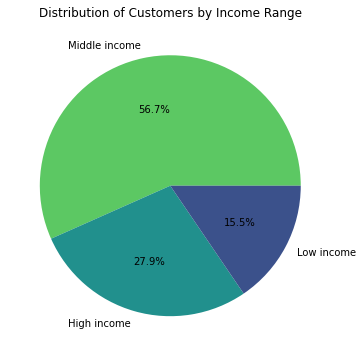

In [54]:
# Income Range distribution
income_range_dist_pie = df_users['income_range'].value_counts().plot.pie(autopct='%1.1f%%', colors = sns.color_palette("viridis_r", 3), ylabel = '', title = 'Distribution of Customers by Income Range')

In [55]:
# Exporting income_range_dist
income_range_dist_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_range_dist_pie.png'))

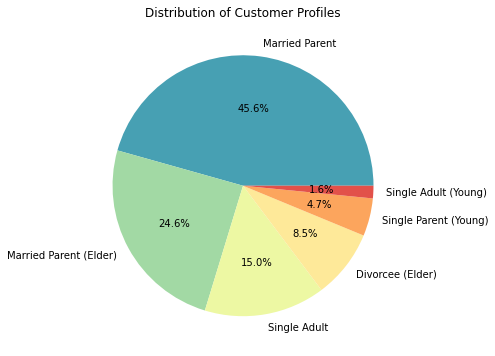

In [56]:
# Customer profile distribution
customer_profile_dist_pie = df_users['customer_profile'].value_counts().plot.pie(autopct='%1.1f%%', colors = sns.color_palette("Spectral_r", 6), ylabel = '', title = 'Distribution of Customer Profiles')

In [57]:
# Exporting customer_profile_dist_pie
customer_profile_dist_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customer_profile_dist_pie.png'))

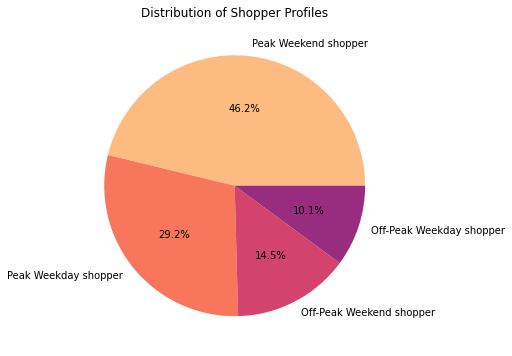

In [58]:
# Shopper profile distribution
shopper_profile_dist_pie = df_users['shopper_profile'].value_counts().plot.pie(autopct='%1.1f%%', colors = sns.color_palette("magma_r", 6), ylabel = '', title = 'Distribution of Shopper Profiles')

In [59]:
# Exporting shopper_profile_dist_pie
shopper_profile_dist_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'shopper_profile_dist_pie.png'))

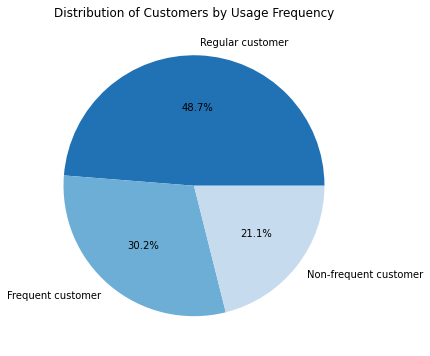

In [309]:
# Frequency_flag distribution
frequency_dist_pie = df_users['frequency_flag'].value_counts().plot.pie(autopct='%1.1f%%', colors = sns.color_palette("Blues_r", 3), ylabel = '', title = 'Distribution of Customers by Usage Frequency')

In [310]:
# Exporting frequency_dist_pie
frequency_dist_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'frequency_dist_pie.png'))

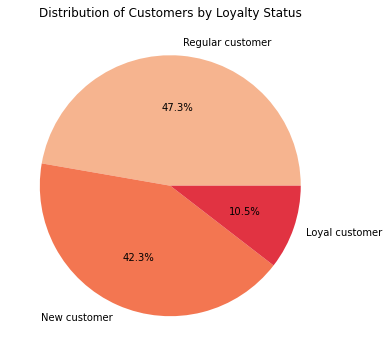

In [62]:
# Loyalty_flag distribution
loyalty_dist_pie = df_users['loyalty_flag'].value_counts().plot.pie(autopct='%1.1f%%', colors = sns.color_palette("rocket_r", 6), ylabel = '', title = 'Distribution of Customers by Loyalty Status')

In [63]:
# Exporting loyalty_dist_pie
loyalty_dist_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_dist_pie.png'))

Text(0.5, 1.0, 'Products Ordered per Department')

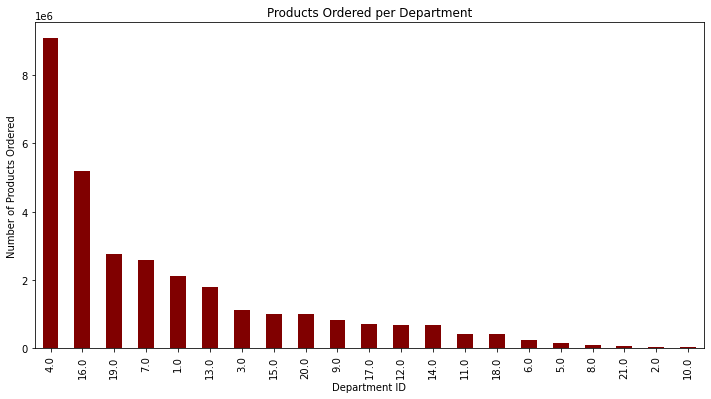

In [277]:
# Charting overall distribution of products ordered per department
department_distribution_bar = df['department_id'].value_counts().plot.bar(color = 'maroon')
department_distribution_bar.set_xlabel('Department ID')
department_distribution_bar.set_ylabel('Number of Products Ordered')
department_distribution_bar.set_title('Products Ordered per Department')

In [ ]:
# Exporting department_distribution_bar
department_distribution_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'department_distribution_bar.png'))

# 05. Aggregate Statistics

In [218]:
# Setting precision to 3 decimal places
pd.set_option('precision', 3)

## Calculating statistics for usage frequency by profile

In [65]:
# Usage frequency stats for each income range
df.groupby('income_range').agg({'days_since_prior_order' : ['min', 'max', 'mean']})

days_since_prior_order             
                                 min   max   mean
income_range                                     
High income                      0.0  30.0  10.76
Low income                       0.0  30.0  11.18
Middle income                    0.0  30.0  10.77

In [66]:
# Usage frequency stats for each customer profile
df.groupby('customer_profile').agg({'days_since_prior_order' : ['min', 'max', 'mean']})

days_since_prior_order             
                                          min   max   mean
customer_profile                                          
Divorcee (Elder)                          0.0  30.0  10.75
Married Parent                            0.0  30.0  10.83
Married Parent (Elder)                    0.0  30.0  10.81
Single Adult                              0.0  30.0  10.79
Single Adult (Young)                      0.0  30.0  11.07
Single Parent (Young)                     0.0  30.0  10.75

In [67]:
# Usage frequency stats for each shopper profile
df.groupby('shopper_profile').agg({'days_since_prior_order' : ['min', 'max', 'mean']})

days_since_prior_order             
                                            min   max   mean
shopper_profile                                             
Off-Peak Weekday shopper                    0.0  30.0  11.24
Off-Peak Weekend shopper                    0.0  30.0  11.20
Peak Weekday shopper                        0.0  30.0  10.63
Peak Weekend shopper                        0.0  30.0  10.73

## Calculating statistics for expenditure by profile

In [68]:
# Creating new "order_expenditure" column by taking the sum of all prices per order
df['order_expenditure'] = df.groupby('order_id')['prices'].transform(np.sum)

In [69]:
# Expenditure stats for each income range
df.groupby('income_range').agg({'order_expenditure' : ['min', 'max', 'mean']})

order_expenditure                
                            min     max    mean
income_range                                   
High income                 0.0  1047.4  126.04
Low income                  0.0   875.0   92.96
Middle income               0.0  1092.2  125.66

In [70]:
# Expenditure stats for each customer profile
df.groupby('customer_profile').agg({'order_expenditure' : ['min', 'max', 'mean']})

order_expenditure                
                                     min     max    mean
customer_profile                                        
Divorcee (Elder)                     0.0   875.0  122.42
Married Parent                       0.0  1092.2  122.75
Married Parent (Elder)               0.0   787.0  121.62
Single Adult                         0.0   712.0  121.69
Single Adult (Young)                 0.0   529.6  119.19
Single Parent (Young)                0.0   750.3  122.43

In [71]:
# Expenditure stats for each shopper profile
df.groupby('shopper_profile').agg({'order_expenditure' : ['min', 'max', 'mean']})

order_expenditure                
                                       min     max    mean
shopper_profile                                           
Off-Peak Weekday shopper               0.0   736.7  119.76
Off-Peak Weekend shopper               0.0   751.5  120.97
Peak Weekday shopper                   0.0  1092.2  117.62
Peak Weekend shopper                   0.0  1047.4  125.38

# 06. Comparing Customer Profiles to Regions and Departments

In [322]:
# Setting chart size to be larger from now on
plt.rcParams["figure.figsize"] = (12,6)

## Profiles vs. Region

In [73]:
## Customer Profiles vs. Region

# Crosstab
customer_region = pd.crosstab(df['Region'], df['customer_profile'], dropna= False)

In [74]:
customer_region

customer_profile,Divorcee (Elder),Married Parent,Married Parent (Elder),Single Adult,Single Adult (Young),Single Parent (Young)
Region,,,,,,
Midwest,617640,3327853,1762931,1109286,97300,351685
Northeast,479148,2507025,1349921,792096,84393,256778
South,877926,4704227,2524997,1540918,165214,505852
West,672645,3635877,1947243,1193396,116048,368213


<AxesSubplot:title={'center':'Customer Profiles Across Regions'}, xlabel='Region'>

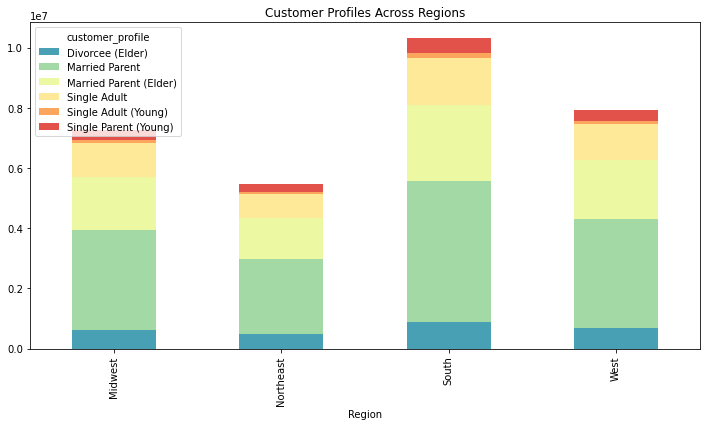

In [75]:
# Plot
customer_region.plot.bar(stacked = True, color = sns.color_palette("Spectral_r", 6), title= 'Customer Profiles Across Regions')

In [76]:
## Income Ranges vs. Region

# Crosstab
income_region = pd.crosstab(df['Region'], df['income_range'], dropna= False)

In [77]:
income_region

income_range,High income,Low income,Middle income
Region,,,
Midwest,2189831,784531,4292333
Northeast,1629786,587849,3251726
South,3024693,1143924,6150517
West,2339330,849915,4744177


<AxesSubplot:title={'center':'Customer Income Ranges Across Regions'}, xlabel='Region'>

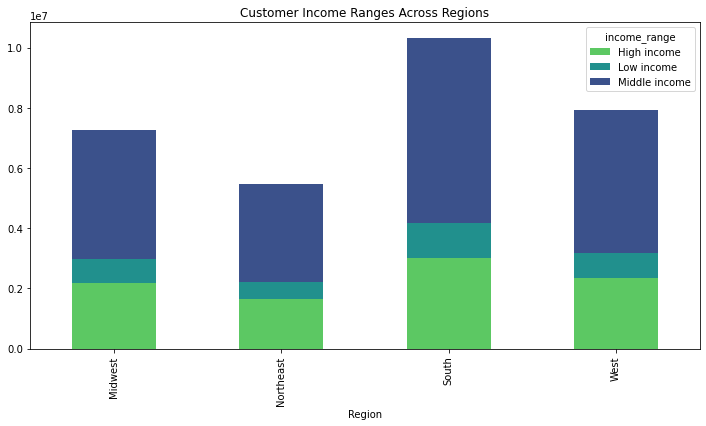

In [78]:
# Plot
income_region.plot.bar(stacked = True, color = sns.color_palette("viridis_r", 3), title= 'Customer Income Ranges Across Regions')

In [79]:
## Shopper Profiles vs. Region

# Crosstab
shopper_region = pd.crosstab(df['Region'], df['shopper_profile'], dropna= False)

In [80]:
shopper_region

shopper_profile,Off-Peak Weekday shopper,Off-Peak Weekend shopper,Peak Weekday shopper,Peak Weekend shopper
Region,,,,
Midwest,607429,1001073,1959894,3698299
Northeast,465537,776035,1458930,2768859
South,878140,1397204,2772592,5271198
West,638431,1080992,2139380,4074619


<AxesSubplot:title={'center':'Shopper Profiles Across Regions'}, xlabel='Region'>

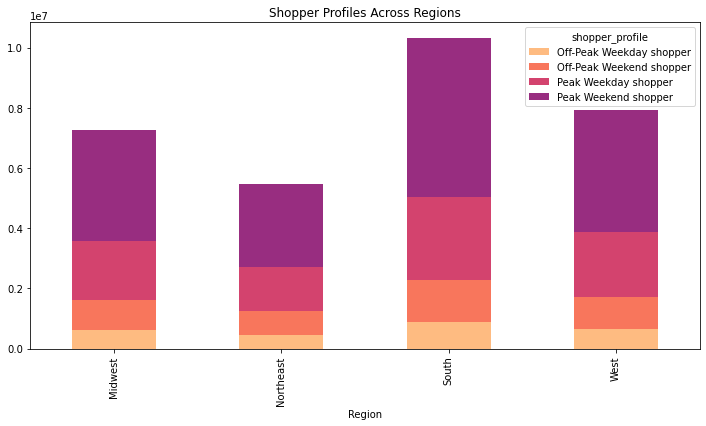

In [81]:
# Plot
shopper_region.plot.bar(stacked = True, color = sns.color_palette("magma_r", 6), title= 'Shopper Profiles Across Regions')

## Profiles vs. Departments

In [82]:
# Department_id with corresponding departments for reference
df_dept.drop(columns = 'Unnamed: 0')

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [83]:
## Customer Profiles vs. Departments

# Crosstab
customer_department = pd.crosstab(df['department_id'], df['customer_profile'], dropna= False)

In [84]:
customer_department

customer_profile,Divorcee (Elder),Married Parent,Married Parent (Elder),Single Adult,Single Adult (Young),Single Parent (Young)
department_id,,,,,,
1.0,183957,968399,520992,314316,31075,102993
2.0,2842,15521,8361,5315,557,1815
3.0,95735,511388,274361,169153,16507,53684
4.0,777095,4149259,2224036,1362437,135910,430539
5.0,11859,65236,34185,23038,1930,8379
6.0,21814,117411,61725,38480,4167,12394
7.0,220879,1174331,633122,385222,39240,119107
8.0,8025,41401,22719,14018,1559,5338
9.0,70251,377897,200401,121597,12448,39542


<AxesSubplot:title={'center':'Customer Profiles Across Departments'}, xlabel='department_id'>

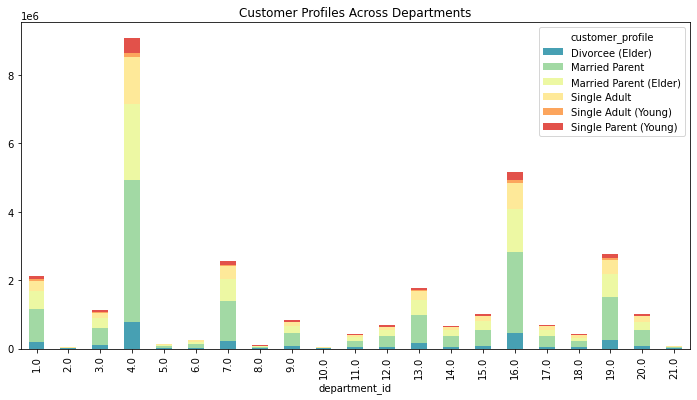

In [85]:
# Plot
customer_department.plot.bar(stacked = True, color = sns.color_palette("Spectral_r", 6), title= 'Customer Profiles Across Departments')

In [86]:
## Income Ranges vs. Departments

# Crosstab
income_department = pd.crosstab(df['department_id'], df['income_range'], dropna= False)

In [87]:
income_department

income_range,High income,Low income,Middle income
department_id,,,
1.0,641809,215177,1264746
2.0,10310,3886,20215
3.0,342744,106757,671327
4.0,2724369,826314,5528593
5.0,46709,18047,79871
6.0,77359,21636,156996
7.0,730268,383121,1458512
8.0,29843,8612,54605
9.0,253515,64481,504140


<AxesSubplot:title={'center':'Income Ranges Across Departments'}, xlabel='department_id'>

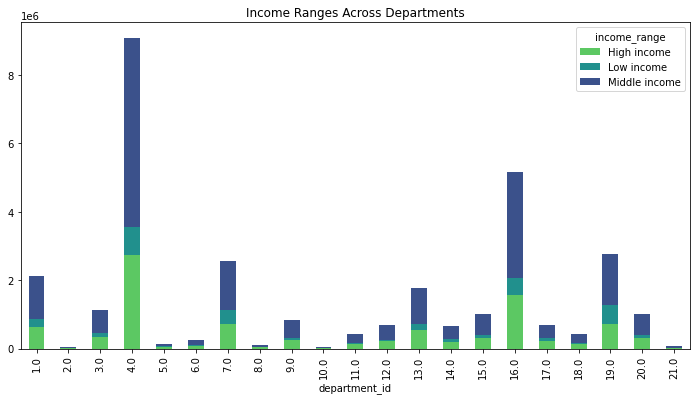

In [88]:
# Plot
income_department.plot.bar(stacked = True, color = sns.color_palette("viridis_r", 3), title= 'Income Ranges Across Departments')

The most significant differences in department preference by income range is that customers in the low income bracket tend to spend less on produce (4) and dairy/eggs (16), and more on snacks (19) and beverages (7).

In [89]:
## Shopper Profiles vs. Departments

# Crosstab
shopper_department = pd.crosstab(df['department_id'], df['shopper_profile'], dropna= False)

In [90]:
shopper_department

shopper_profile,Off-Peak Weekday shopper,Off-Peak Weekend shopper,Peak Weekday shopper,Peak Weekend shopper
department_id,,,,
1.0,201480,308319,558762,1053171
2.0,3219,4538,10672,15982
3.0,90173,152206,302749,575700
4.0,740966,1294175,2264561,4779574
5.0,12416,10838,68367,53006
6.0,20822,34568,66051,134550
7.0,215352,322615,798017,1235917
8.0,11188,12073,28846,40953
9.0,69398,117819,201549,433370


<AxesSubplot:title={'center':'Shopper Profiles Across Departments'}, xlabel='department_id'>

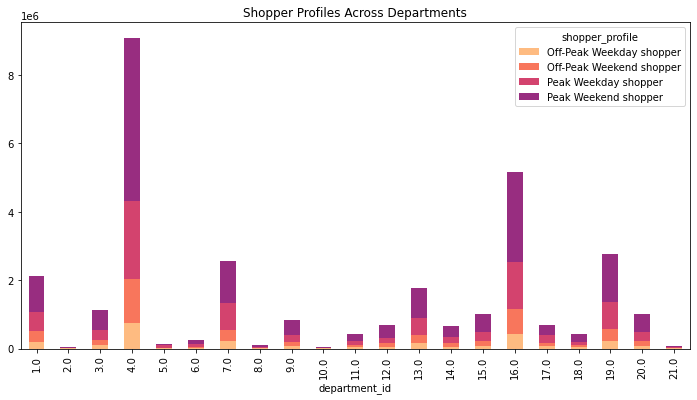

In [91]:
# Plot
shopper_department.plot.bar(stacked = True, color = sns.color_palette("magma_r", 6), title= 'Shopper Profiles Across Departments')

# 07. Customer Behavior Analysis

In [92]:
# Creating subset for the top 3 departments
df_top3depts = df.loc[df['department_id'].isin([4, 16, 19])]

In [94]:
df_top3depts

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,loyalty_flag,spending_flag,frequency_flag,Gender,State,Age,date_joined,n_dependants,fam_status,income,max_order,Region,income_range,customer_profile,peak_flag,day_flag,shopper_profile,order_expenditure
1,2539329,1,1,2,8,NaN,True,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,12.5,Mid-range product,Regularly busy,Average orders,New customer,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,10,South,Low income,Married Parent,Peak shopper,Weekend shopper,Peak Weekend shopper,31.6
2,2539329,1,1,2,8,NaN,True,12427,3,0,Original Beef Jerky,23.0,19.0,4.4,Low-range product,Regularly busy,Average orders,New customer,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,10,South,Low income,Married Parent,Peak shopper,Weekend shopper,Peak Weekend shopper,31.6
3,2539329,1,1,2,8,NaN,True,26088,4,0,Aged White Cheddar Popcorn,23.0,19.0,4.7,Low-range product,Regularly busy,Average orders,New customer,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,10,South,Low income,Married Parent,Peak shopper,Weekend shopper,Peak Weekend shopper,31.6
6,2398795,1,2,3,7,15.0,False,10258,2,0,Pistachios,117.0,19.0,3.0,Low-range product,Slowest days,Average orders,New customer,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,10,South,Low income,Married Parent,Peak shopper,Weekend shopper,Peak Weekend shopper,35.4
7,2398795,1,2,3,7,15.0,False,12427,3,1,Original Beef Jerky,23.0,19.0,4.4,Low-range product,Slowest days,Average orders,New customer,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,10,South,Low income,Married Parent,Peak shopper,Weekend shopper,Peak Weekend shopper,35.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32429925,2977660,206209,13,1,12,7.0,False,16168,3,1,Large Organic Omega3 Brown Eggs,86.0,16.0,11.8,Mid-range product,Busiest days,Most orders,Regular customer,Low spender,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,13,Midwest,High income,Married Parent (Elder),Peak shopper,Weekend shopper,Peak Weekend shopper,61.2
32429928,2977660,206209,13,1,12,7.0,False,38730,6,0,Brownie Crunch High Protein Bar,3.0,19.0,5.9,Mid-range product,Busiest days,Most orders,Regular customer,Low spender,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,13,Midwest,High income,Married Parent (Elder),Peak shopper,Weekend shopper,Peak Weekend shopper,61.2
32429929,2977660,206209,13,1,12,7.0,False,31477,7,0,High Protein Bar Chunky Peanut Butter,3.0,19.0,4.2,Low-range product,Busiest days,Most orders,Regular customer,Low spender,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,13,Midwest,High income,Married Parent (Elder),Peak shopper,Weekend shopper,Peak Weekend shopper,61.2
32429930,2977660,206209,13,1,12,7.0,False,6567,8,0,Chocolate Peanut Butter Protein Bar,3.0,19.0,4.9,Low-range product,Busiest days,Most orders,Regular customer,Low spender,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,13,Midwest,High income,Married Parent (Elder),Peak shopper,Weekend shopper,Peak Weekend shopper,61.2


## Customer Behavior by Region

In [95]:
## Region vs. Expenditure

region_expenditure = df.groupby('Region').agg({'order_expenditure' : ['mean']})

In [96]:
region_expenditure

,order_expenditure
,mean
Region,
Midwest,122.15
Northeast,122.28
South,122.32
West,122.11


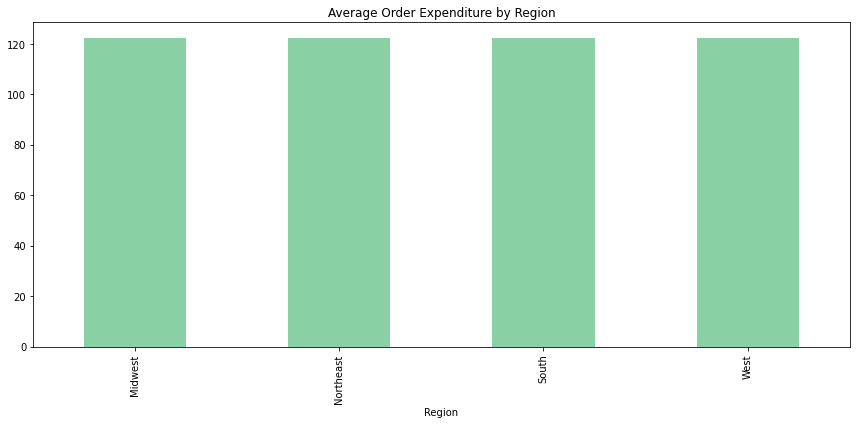

In [273]:
# Plot
region_expenditure_bar = region_expenditure.plot.bar(stacked = True, color = sns.color_palette("Spectral_r", 3), title= 'Average Order Expenditure by Region')
plt.tight_layout()
plt.legend().remove()

In [276]:
# Exporting region_expenditure_bar
region_expenditure_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_expenditure_bar.png'))

In [97]:
## Region vs. Price Range

# Crosstab
region_price_range = pd.crosstab(df['Region'], df['price_range_loc'], dropna= False)

In [98]:
region_price_range

price_range_loc,High-range product,Low-range product,Mid-range product
Region,,,
Midwest,92073,2267085,4901149
Northeast,68929,1712360,3682593
South,130964,3217502,6960981
West,101110,2477895,5347052


In [99]:
# Clipboard to Excel 
# post-hoc analysis reveals that the above figures are almost exactly evenly proportional between regions.
region_price_range.to_clipboard()

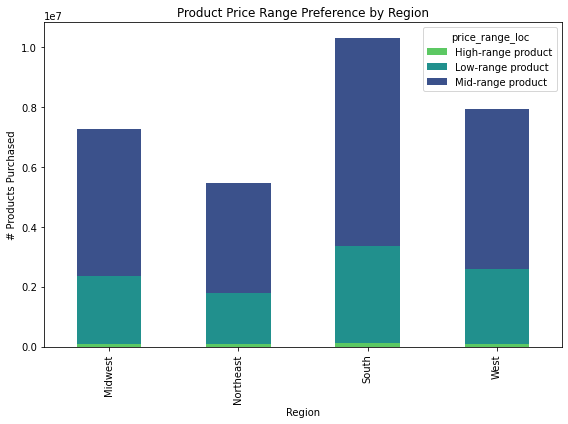

In [311]:
# Plot
region_price_range_bar = region_price_range.plot.bar(stacked = True, color = sns.color_palette("viridis_r", 3), ylabel = '# Products Purchased', title= 'Product Price Range Preference by Region')
plt.tight_layout()

In [312]:
# Exporting region_price_range_bar
region_price_range_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_price_range_bar.png'))

In [313]:
## Region vs. Usage Frequency

# Crosstab
region_frequency = pd.crosstab(df_users['Region'], df_users['frequency_flag'], dropna= False)

In [314]:
region_frequency

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
Region,,,
Midwest,11456,8163,18758
Northeast,8712,5984,13885
South,16308,11486,26400
West,12593,8657,20231


In [315]:
# Clipboard to Excel 
# post-hoc analysis reveals that, again, the above figures are almost exactly evenly proportional between regions.
region_frequency.to_clipboard()

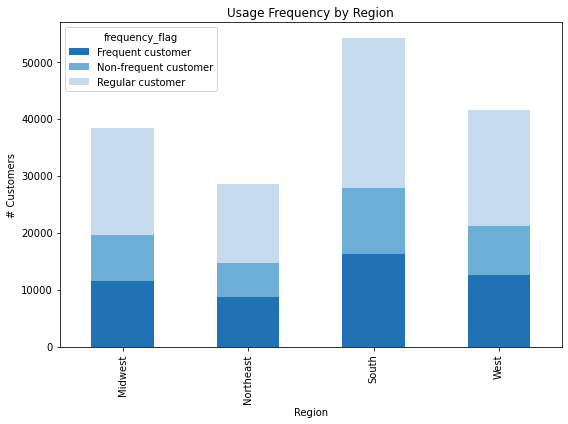

In [316]:
# Plot
region_frequency_bar = region_frequency.plot.bar(stacked = True, color = sns.color_palette("Blues_r", 3), ylabel = '# Customers', title= 'Usage Frequency by Region')
plt.tight_layout()

In [317]:
# Exporting region_frequency_bar
region_frequency_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_frequency_bar.png'))

In [104]:
## Region vs. Top 3 Departments

# Crosstab
region_top3depts = pd.crosstab(df_top3depts['Region'], df_top3depts['department_id'], dropna= False)

In [105]:
region_top3depts

department_id,4.0,16.0,19.0
Region,,,
Midwest,2134116,1211283,645143
Northeast,1593004,913813,493154
South,3027478,1721320,916780
West,2324678,1325890,711329


In [106]:
# Clipboard to Excel 
# post-hoc analysis reveals that, once again, the above figures are almost exactly evenly proportional between regions.
region_top3depts.to_clipboard()

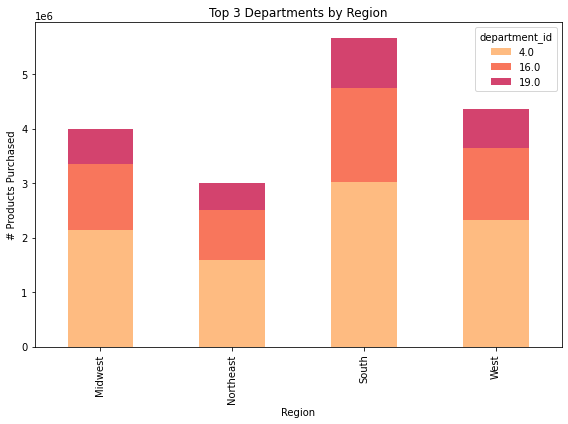

In [318]:
# Plot
region_top3depts_bar = region_top3depts.plot.bar(stacked = True, color = sns.color_palette("magma_r", 6), ylabel = '# Products Purchased', title= 'Top 3 Departments by Region')
plt.tight_layout()

In [319]:
# Exporting region_top3depts_bar
region_top3depts_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_top3depts_bar.png'))

## Customer Behavior by Loyalty Status

In [107]:
## Loyalty Status vs. Expenditure

loyalty_expenditure = df.groupby('loyalty_flag').agg({'order_expenditure' : ['mean']})

In [110]:
loyalty_expenditure # there is some slight variation. Regular customers spend the most, Loyal customers spend the least.

,order_expenditure
,mean
loyalty_flag,
Loyal customer,120.55
New customer,121.73
Regular customer,123.45


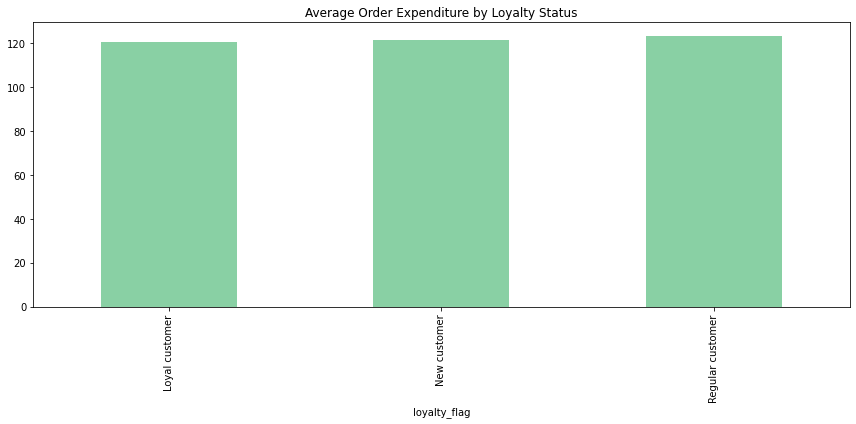

In [271]:
# Plot
loyalty_expenditure_bar = loyalty_expenditure.plot.bar(color = sns.color_palette("Spectral_r", 3), title= 'Average Order Expenditure by Loyalty Status')
plt.tight_layout()
plt.legend().remove()

In [272]:
# Exporting loyalty_expenditure_bar
loyalty_expenditure_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_expenditure_bar.png'))

In [111]:
## Loyalty vs. Price Range

# Crosstab
loyalty_price_range = pd.crosstab(df['loyalty_flag'], df['price_range_loc'], dropna= False)

In [112]:
loyalty_price_range

price_range_loc,High-range product,Low-range product,Mid-range product
loyalty_flag,,,
Loyal customer,118606,3214690,6949467
New customer,65028,1501290,3236484
Regular customer,209442,4958862,10705824


In [114]:
# Clipboard to Excel 
# post-hoc analysis shows that there is little variation.
loyalty_price_range.to_clipboard()

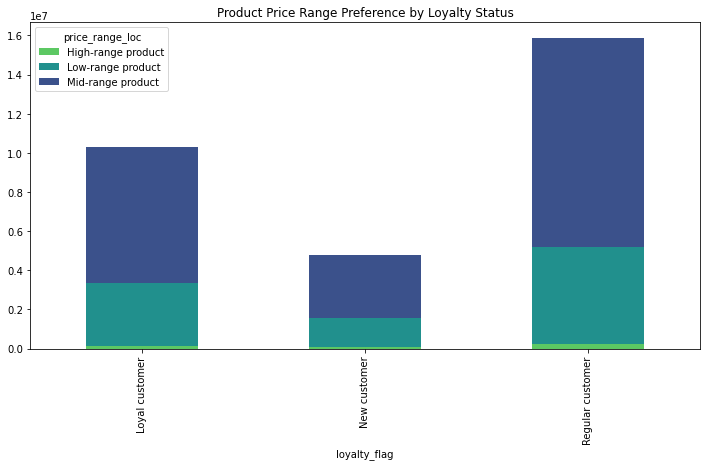

In [144]:
loyalty_price_range_bar = loyalty_price_range.plot.bar(stacked = True, color = sns.color_palette("viridis_r", 3), title= 'Product Price Range Preference by Loyalty Status')

In [270]:
# Exporting loyalty_price_range_bar
loyalty_price_range_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_price_range_bar.png'))

In [146]:
## Loyalty Status vs. Usage Frequency

# Crosstab
loyalty_frequency = pd.crosstab(df_users['loyalty_flag'], df_users['frequency_flag'], dropna= False)

In [147]:
loyalty_frequency

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
loyalty_flag,,,
Loyal customer,16950,0,67
New customer,10270,28278,30204
Regular customer,21849,6012,49003


In [155]:
# Clipboard to Excel 
# post-hoc analysis shows huge variations!
loyalty_frequency.to_clipboard()

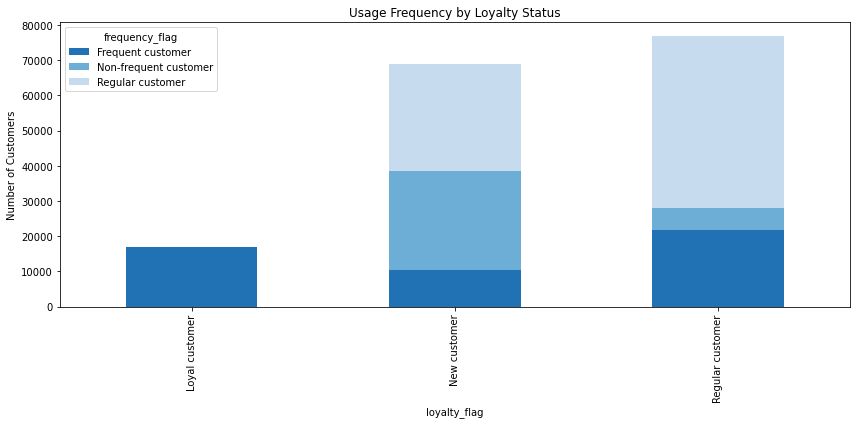

In [302]:
loyalty_frequency_bar = loyalty_frequency.plot.bar(stacked = True, color = sns.color_palette("Blues_r", 3), ylabel = 'Number of Customers', title= 'Usage Frequency by Loyalty Status')
plt.tight_layout()

In [303]:
# Exporting loyalty_frequency_bar
loyalty_frequency_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_frequency_bar.png'))

In [151]:
## Loyalty Status vs. Top 3 Departments

# Crosstab
loyalty_top3depts = pd.crosstab(df_top3depts['loyalty_flag'], df_top3depts['department_id'], dropna= False)

In [152]:
loyalty_top3depts

department_id,4.0,16.0,19.0
loyalty_flag,,,
Loyal customer,3147376,1829377,943150
New customer,1336607,749158,413107
Regular customer,4595293,2593771,1410149


In [154]:
# Clipboard to Excel 
# post-hoc analysis shows little variation.
loyalty_top3depts.to_clipboard()

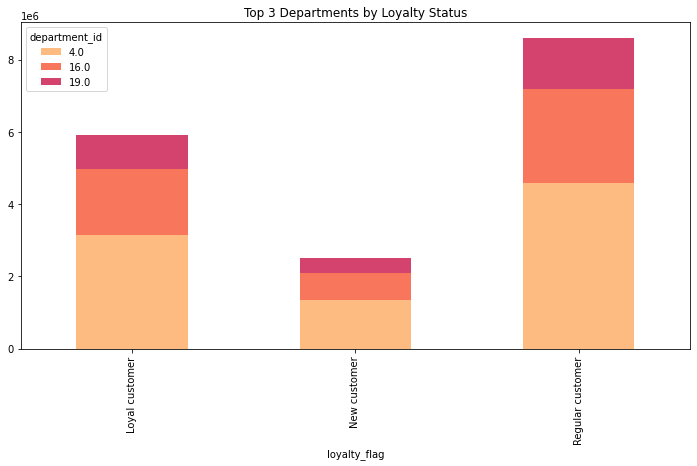

In [153]:
loyalty_top3depts_bar = loyalty_top3depts.plot.bar(stacked = True, color = sns.color_palette("magma_r", 6), title= 'Top 3 Departments by Loyalty Status')

## Customer Behavior by Income Range

In [157]:
## Income Range vs. Expenditure

income_expenditure = df.groupby(['income_range']).agg({'order_expenditure' : ['mean']})

In [159]:
income_expenditure

,order_expenditure
,mean
income_range,
High income,126.04
Low income,92.96
Middle income,125.66


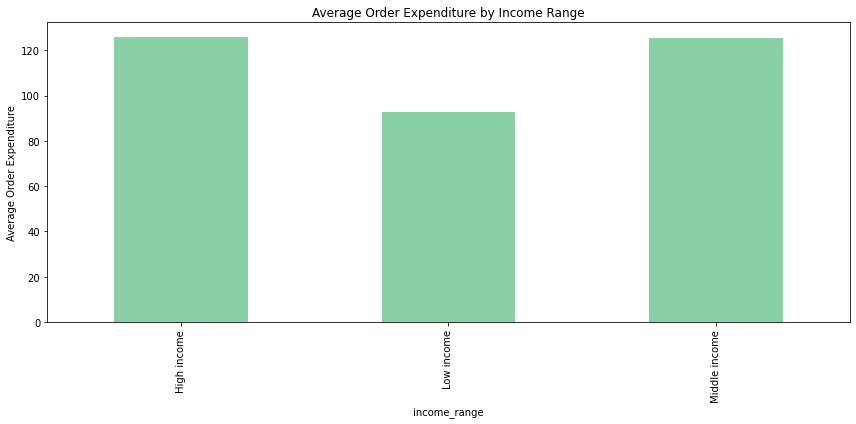

In [267]:
income_expenditure_bar = income_expenditure.plot.bar(color = sns.color_palette("Spectral_r", 3), ylabel = 'Average Order Expenditure', title= 'Average Order Expenditure by Income Range')
plt.tight_layout()
plt.legend().remove()

In [268]:
# Exporting income_expenditure_bar
income_expenditure_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_expenditure_bar.png'))

In [161]:
## Income Range vs. Price Range

# Crosstab
income_price_range = pd.crosstab(df['income_range'], df['price_range_loc'], dropna= False)

In [162]:
income_price_range

price_range_loc,High-range product,Low-range product,Mid-range product
income_range,,,
High income,127850,2730957,6316738
Low income,17665,1390774,1954115
Middle income,247561,5553111,12620922


In [164]:
# Clipboard to Excel 
# post-hoc analysis shows that low income folks purchase fewer high range and mid range products and more low-range products.
income_price_range.to_clipboard()

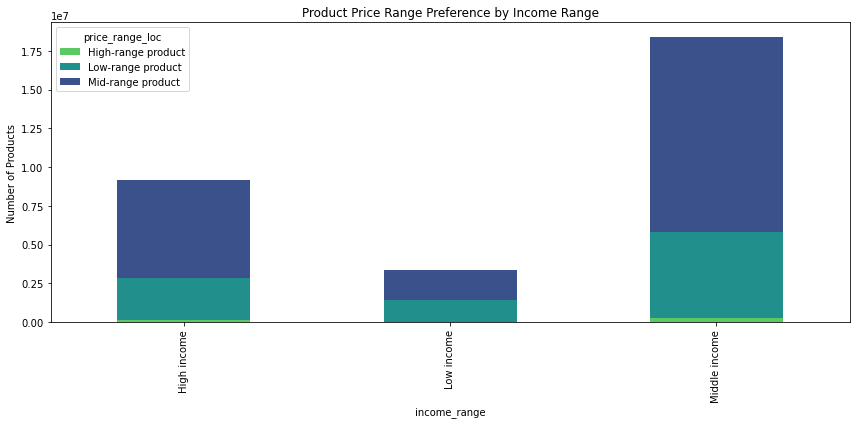

In [168]:
# Plot
income_price_range_bar = income_price_range.plot.bar(stacked = True, color = sns.color_palette("viridis_r", 3), ylabel = 'Number of Products', title= 'Product Price Range Preference by Income Range')
plt.tight_layout()

In [169]:
# Exporting income_price_range_bar
income_price_range_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_price_range_bar.png'))

In [174]:
## Income Range vs. Usage Frequency

# Crosstab
income_frequency = pd.crosstab(df_users['income_range'], df_users['frequency_flag'], dropna= False)

In [175]:
income_frequency

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
income_range,,,
High income,13996,9075,22223
Low income,6945,6401,11846
Middle income,28128,18814,45205


In [176]:
# Clipboard to Excel 
# post-hoc analysis shows some variation!
income_frequency.to_clipboard()

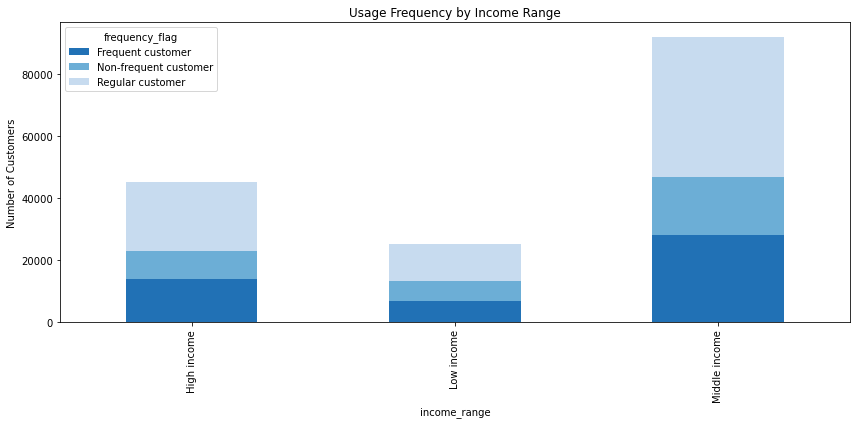

In [299]:
income_frequency_bar = income_frequency.plot.bar(stacked = True, color = sns.color_palette("Blues_r", 3), ylabel = 'Number of Customers', title= 'Usage Frequency by Income Range')
plt.tight_layout()

In [300]:
# Exporting income_frequency_bar
income_frequency_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_frequency_bar.png'))

In [180]:
## Income Range vs. Top 3 Departments

# Crosstab
income_top3depts = pd.crosstab(df_top3depts['income_range'], df_top3depts['department_id'], dropna= False)

In [181]:
income_top3depts

department_id,4.0,16.0,19.0
income_range,,,
High income,2724369,1550574,713688
Low income,826314,502363,559529
Middle income,5528593,3119369,1493189


In [182]:
# Clipboard to Excel 
# post-hoc analysis shows some variation!
income_top3depts.to_clipboard()

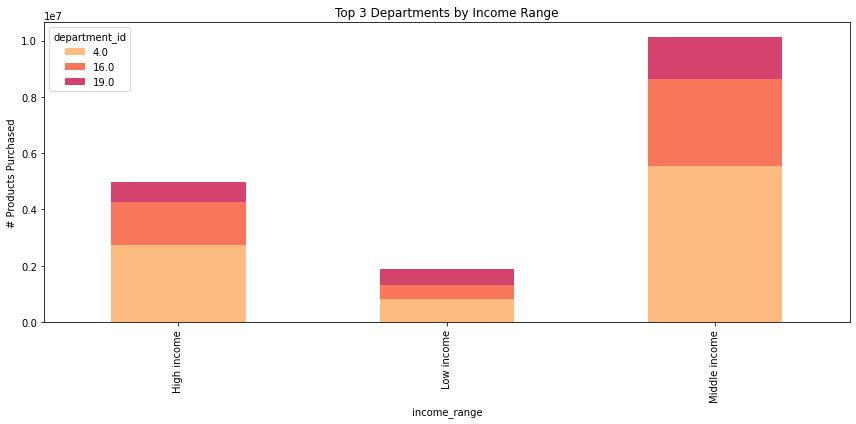

In [212]:
income_top3depts_bar = income_top3depts.plot.bar(stacked = True, color = ['#febb81', '#f8765c', '#d3436e'], ylabel = '# Products Purchased', title= 'Top 3 Departments by Income Range')
plt.tight_layout()

In [203]:
# Exporting income_top3depts_bar
income_top3depts_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_top3depts_bar.png'))

In [191]:
## Income Range vs. Top 3 Departments continued, using code written prior to notebook revision

# Creating income/top 3 departments group
top3depts_income = df_top3depts.groupby(['department_id']).agg({'income_range' : ['value_counts']})

In [192]:
# Taking steps to calculate a normalized count of each income range's relative department preference
top3depts_income.reset_index(inplace = True)

In [219]:
df['income_range'].value_counts(normalize = True)

Middle income    0.595
High income      0.296
Low income       0.109
Name: income_range, dtype: float64

In [195]:
# Normalized value_counts figures, three times each (for each of the top 3 departments)
top3depts_income['normalized_percent'] = ['0.595', '0.296', '0.109', '0.595', '0.296', '0.109', '0.595', '0.296', '0.109']

In [196]:
# Creating new column to do away with the MultiIndex
top3depts_income['real_counts'] = top3depts_income['income_range', 'value_counts']

In [197]:
# Changing data type to be workable in following calculation
top3depts_income['normalized_percent'] = top3depts_income['normalized_percent'].astype('float')
top3depts_income['normalized_percent'].dtype

dtype('float64')

In [198]:
# Normalizing total count of product purchases per income range by the percent of whole of each income range respectively
top3depts_income['normalized_counts'] = top3depts_income['real_counts']/top3depts_income['normalized_percent']

In [221]:
top3depts_income

department_id   income_range              normalized_percent real_counts  \
                               value_counts                                  
0           4.0  Middle income      5528593              0.595     5528593   
1           4.0    High income      2724369              0.296     2724369   
2           4.0     Low income       826314              0.109      826314   
3          16.0  Middle income      3119369              0.595     3119369   
4          16.0    High income      1550574              0.296     1550574   
5          16.0     Low income       502363              0.109      502363   
6          19.0  Middle income      1493189              0.595     1493189   
7          19.0    High income       713688              0.296      713688   
8          19.0     Low income       559529              0.109      559529   

  normalized_counts  
                     
0         9.292e+06  
1         9.204e+06  
2         7.581e+06  
3         5.243e+06  
4         5.238e+06  
5         4.609e+06  
6         2.510e+06  
7         2.411e+06  
8         5.133e+06

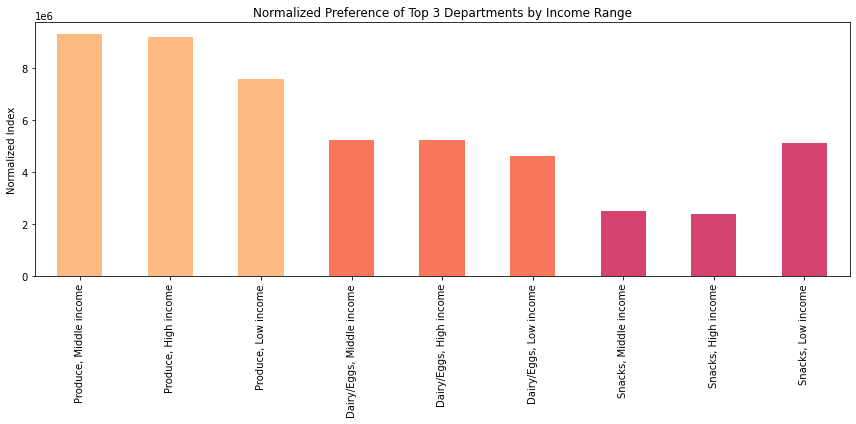

In [325]:
# Charting the normalized preferences of the top 3 departments across the three income ranges.
top3depts_income_bar = top3depts_income['normalized_counts'].plot.bar(title = 'Normalized Preference of Top 3 Departments by Income Range', color = ['#febb81', '#febb81', '#febb81', '#f8765c', '#f8765c', '#f8765c', '#d3436e', '#d3436e', '#d3436e'], ylabel = 'Normalized Index')
top3depts_income_bar.set_xticklabels(['Produce, Middle income', 'Produce, High income', 'Produce, Low income', 'Dairy/Eggs, Middle income', 'Dairy/Eggs, High income', 'Dairy/Eggs, Low income', 'Snacks, Middle income', 'Snacks, High income', 'Snacks, Low income'])
plt.tight_layout()

Results derived from earlier are visualized more clearly here: spending between high and middle income customers is nearly identical, while among low income customers there is lower spending on produce, much greater spending on snacks, and slightly lower spending on dairy/eggs.

In [326]:
# Exporting top3depts_income_bar
top3depts_income_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'top3depts_income_bar.png'))

## Customer Behavior by Customer Profile (Age, Family Status, Parental Status)

In [222]:
## Customer Profiles vs. Expenditure

customer_expenditure = df.groupby(['customer_profile']).agg({'order_expenditure' : ['mean']})

In [223]:
customer_expenditure

,order_expenditure
,mean
customer_profile,
Divorcee (Elder),122.425
Married Parent,122.747
Married Parent (Elder),121.623
Single Adult,121.692
Single Adult (Young),119.192
Single Parent (Young),122.434


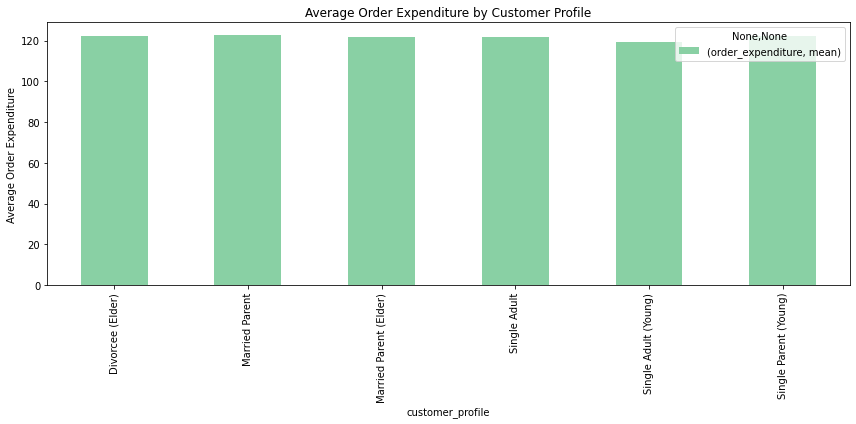

In [224]:
customer_expenditure_bar = customer_expenditure.plot.bar(color = sns.color_palette("Spectral_r", 3), ylabel = 'Average Order Expenditure', title= 'Average Order Expenditure by Customer Profile')
plt.tight_layout()

In [225]:
# Exporting customer_expenditure_bar
customer_expenditure_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customer_expenditure_bar.png'))

In [226]:
## Customer Profile vs. Price Range

# Crosstab
customer_price_range = pd.crosstab(df['customer_profile'], df['price_range_loc'], dropna= False)

In [227]:
customer_price_range

price_range_loc,High-range product,Low-range product,Mid-range product
customer_profile,,,
Divorcee (Elder),33694,826382,1784756
Married Parent,180994,4428737,9552131
Married Parent (Elder),96996,2365060,5116287
Single Adult,56741,1446687,3127655
Single Adult (Young),5847,146169,310578
Single Parent (Young),18804,461807,1000368


In [228]:
# Clipboard to Excel 
# post-hoc analysis shows almost no variation between customer profiles
customer_price_range.to_clipboard()

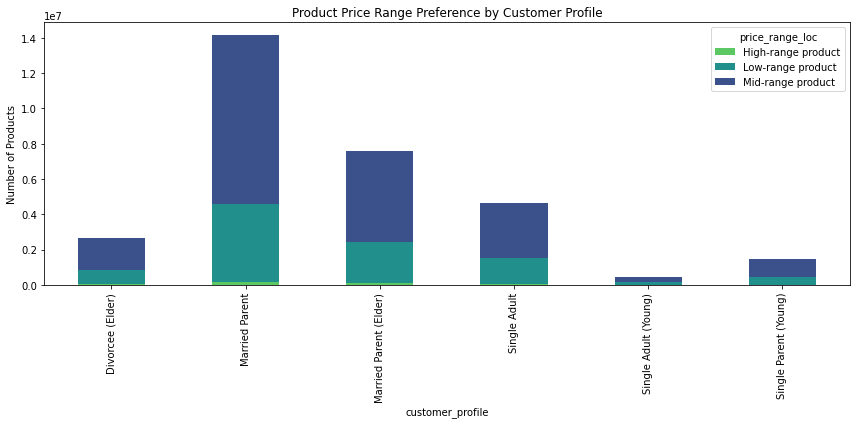

In [229]:
# Plot
customer_price_range_bar = customer_price_range.plot.bar(stacked = True, color = sns.color_palette("viridis_r", 3), ylabel = 'Number of Products', title= 'Product Price Range Preference by Customer Profile')
plt.tight_layout()

In [230]:
# Exporting customer_price_range_bar
customer_price_range_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customer_price_range_bar.png'))

In [231]:
## Customer Profiles vs. Usage Frequency

# Crosstab
customer_frequency = pd.crosstab(df_users['customer_profile'], df_users['frequency_flag'], dropna= False)

In [232]:
customer_frequency

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
customer_profile,,,
Divorcee (Elder),4191,2854,6787
Married Parent,22420,15669,36131
Married Parent (Elder),12154,8463,19460
Single Adult,7281,5174,11913
Single Adult (Young),702,534,1292
Single Parent (Young),2321,1596,3691


In [233]:
# Clipboard to Excel 
# post-hoc analysis shows that Young Single Adults are a little more likely to be a regular customer and a little less likely to be a frequent customer.
customer_frequency.to_clipboard()

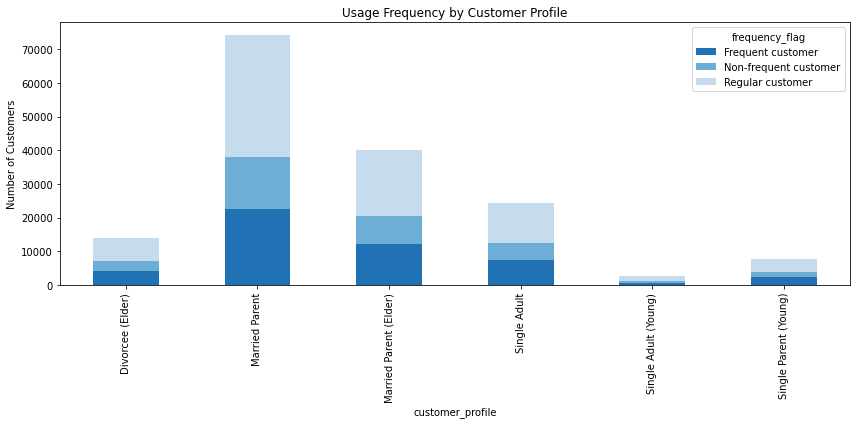

In [297]:
customer_frequency_bar = customer_frequency.plot.bar(stacked = True, color = sns.color_palette("Blues_r", 3), ylabel = 'Number of Customers', title= 'Usage Frequency by Customer Profile')
plt.tight_layout()

In [298]:
# Exporting customer_frequency_bar
customer_frequency_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customer_frequency_bar.png'))

In [236]:
## Customer Profile vs. Top 3 Departments

# Crosstab
customer_top3depts = pd.crosstab(df_top3depts['customer_profile'], df_top3depts['department_id'], dropna= False)

In [237]:
customer_top3depts

department_id,4.0,16.0,19.0
customer_profile,,,
Divorcee (Elder),777095,442162,236244
Married Parent,4149259,2366663,1271121
Married Parent (Elder),2224036,1262426,673537
Single Adult,1362437,774497,412703
Single Adult (Young),135910,76544,41491
Single Parent (Young),430539,250014,131310


In [238]:
# Clipboard to Excel 
# post-hoc analysis shows almost zero variation
customer_top3depts.to_clipboard()

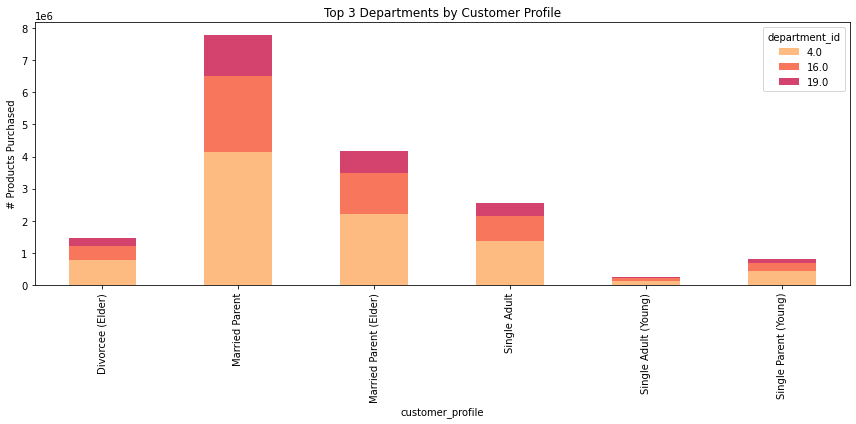

In [239]:
customer_top3depts_bar = customer_top3depts.plot.bar(stacked = True, color = ['#febb81', '#f8765c', '#d3436e'], ylabel = '# Products Purchased', title= 'Top 3 Departments by Customer Profile')
plt.tight_layout()

In [240]:
# Exporting customer_top3depts_bar
customer_top3depts_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customer_top3depts_bar.png'))

## Customer Behavior by Shopper Profile (Favored Day/Time)

In [241]:
## Shopper Profiles vs. Expenditure

shopper_expenditure = df.groupby(['shopper_profile']).agg({'order_expenditure' : ['mean']})

In [242]:
shopper_expenditure

,order_expenditure
,mean
shopper_profile,
Off-Peak Weekday shopper,119.765
Off-Peak Weekend shopper,120.966
Peak Weekday shopper,117.616
Peak Weekend shopper,125.382


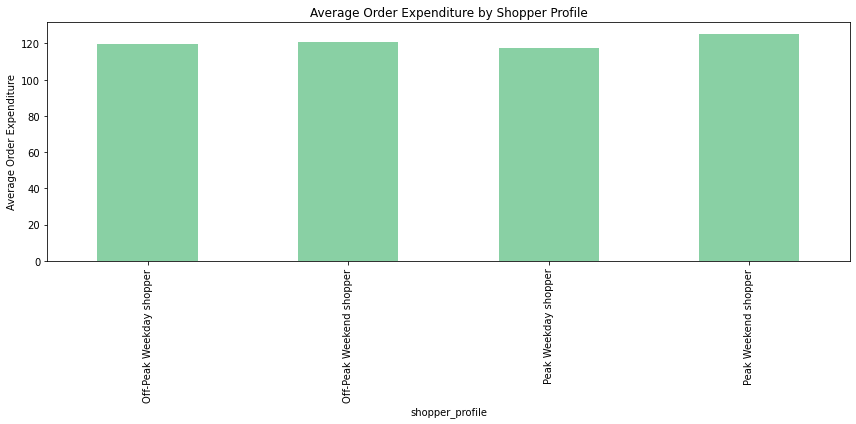

In [265]:
shopper_expenditure_bar = shopper_expenditure.plot.bar(color = sns.color_palette("Spectral_r", 3), ylabel = 'Average Order Expenditure', title= 'Average Order Expenditure by Shopper Profile')
plt.tight_layout()
plt.legend().remove()

In [266]:
# Exporting shopper_expenditure_bar
shopper_expenditure_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'shopper_expenditure_bar.png'))

In [245]:
## Shopper Profile vs. Price Range

# Crosstab
shopper_price_range = pd.crosstab(df['shopper_profile'], df['price_range_loc'], dropna= False)

In [246]:
shopper_price_range

price_range_loc,High-range product,Low-range product,Mid-range product
shopper_profile,,,
Off-Peak Weekday shopper,32859,806181,1748469
Off-Peak Weekend shopper,54638,1315250,2881598
Peak Weekday shopper,96508,2648600,5578433
Peak Weekend shopper,209071,4904811,10683275


In [247]:
# Clipboard to Excel 
# post-hoc analysis shows almost no variation between customer profiles
shopper_price_range.to_clipboard()

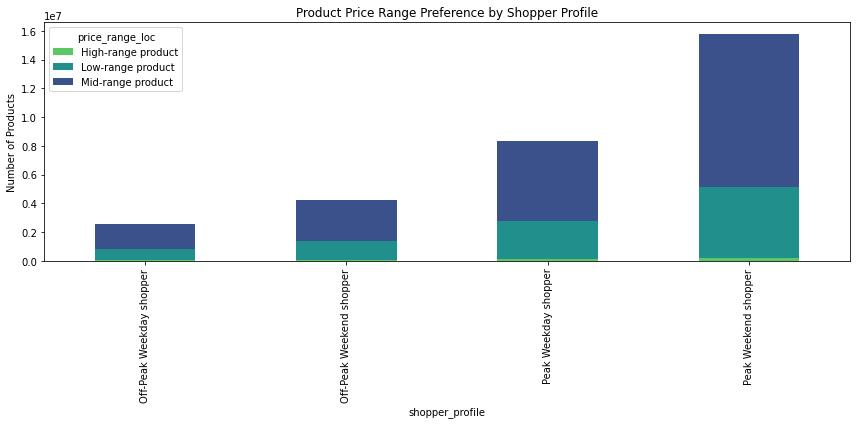

In [248]:
# Plot
shopper_price_range_bar = shopper_price_range.plot.bar(stacked = True, color = sns.color_palette("viridis_r", 3), ylabel = 'Number of Products', title= 'Product Price Range Preference by Shopper Profile')
plt.tight_layout()

In [249]:
# Exporting shopper_price_range_bar
shopper_price_range_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'shopper_price_range_bar.png'))

In [250]:
## Shopper Profiles vs. Usage Frequency

# Crosstab
shopper_frequency = pd.crosstab(df_users['shopper_profile'], df_users['frequency_flag'], dropna= False)

In [251]:
shopper_frequency

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
shopper_profile,,,
Off-Peak Weekday shopper,4811,3762,7850
Off-Peak Weekend shopper,6684,5240,11627
Peak Weekday shopper,14858,10141,22495
Peak Weekend shopper,22716,15147,37302


In [252]:
# Clipboard to Excel 
# post-hoc analysis shows some variation!
shopper_frequency.to_clipboard()

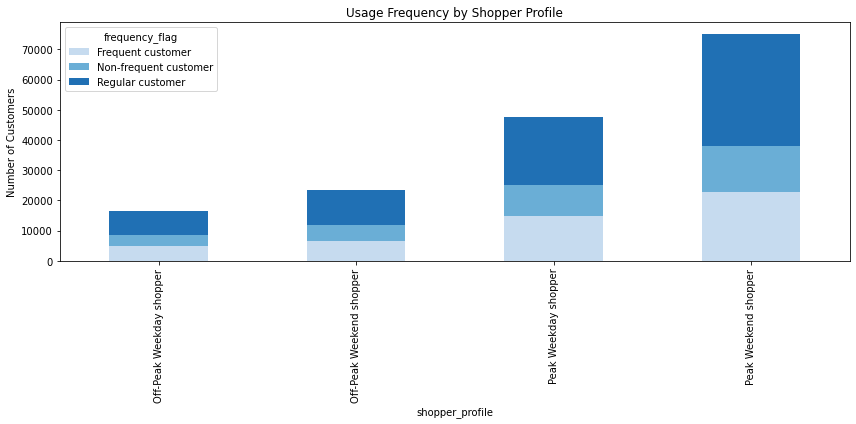

In [253]:
shopper_frequency_bar = shopper_frequency.plot.bar(stacked = True, color = sns.color_palette("Blues", 3), ylabel = 'Number of Customers', title= 'Usage Frequency by Shopper Profile')
plt.tight_layout()

In [254]:
# Exporting shopper_frequency_bar
shopper_frequency_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'shopper_frequency_bar.png'))

In [255]:
## Shopper Profile vs. Top 3 Departments

# Crosstab
shopper_top3depts = pd.crosstab(df_top3depts['shopper_profile'], df_top3depts['department_id'], dropna= False)

In [256]:
shopper_top3depts

department_id,4.0,16.0,19.0
shopper_profile,,,
Off-Peak Weekday shopper,740966,425783,213846
Off-Peak Weekend shopper,1294175,715618,346350
Peak Weekday shopper,2264561,1389657,810275
Peak Weekend shopper,4779574,2641248,1395935


In [257]:
# Clipboard to Excel 
# post-hoc analysis shows some variation!
shopper_top3depts.to_clipboard()

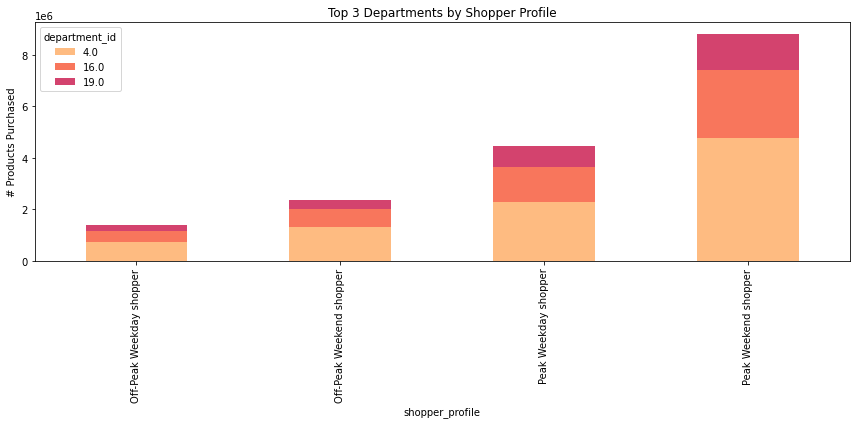

In [258]:
shopper_top3depts_bar = shopper_top3depts.plot.bar(stacked = True, color = ['#febb81', '#f8765c', '#d3436e'], ylabel = '# Products Purchased', title= 'Top 3 Departments by Shopper Profile')
plt.tight_layout()

In [259]:
# Exporting shopper_top3depts_bar
shopper_top3depts_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'shopper_top3depts_bar.png'))

In [279]:
## Shopper profiles vs. Top 3 departments continued, using old code

# Creating shopper profile/top 3 departments group
top3depts_shopper = df_top3depts.groupby(['department_id']).agg({'shopper_profile' : ['value_counts']})

In [280]:
# Taking steps to calculate a normalized count of each shopper profile's relative department preference
top3depts_shopper.reset_index(inplace = True)

In [281]:
df['shopper_profile'].value_counts(normalize = True)

Peak Weekend shopper        0.510
Peak Weekday shopper        0.269
Off-Peak Weekend shopper    0.137
Off-Peak Weekday shopper    0.084
Name: shopper_profile, dtype: float64

In [282]:
top3depts_shopper['normalized_percent'] = ['0.510', '0.269', '0.137', '0.084', '0.510', '0.269', '0.137', '0.084', '0.510', '0.269', '0.137', '0.084']

In [283]:
top3depts_shopper['real_counts'] = top3depts_shopper['shopper_profile', 'value_counts']

In [284]:
top3depts_shopper['normalized_percent'] = top3depts_shopper['normalized_percent'].astype('float')
top3depts_shopper['normalized_percent'].dtype

dtype('float64')

In [285]:
top3depts_shopper['normalized_counts'] = top3depts_shopper['real_counts']/top3depts_shopper['normalized_percent']

In [286]:
top3depts_shopper

department_id           shopper_profile              normalized_percent  \
                                           value_counts                      
0            4.0      Peak Weekend shopper      4779574              0.510   
1            4.0      Peak Weekday shopper      2264561              0.269   
2            4.0  Off-Peak Weekend shopper      1294175              0.137   
3            4.0  Off-Peak Weekday shopper       740966              0.084   
4           16.0      Peak Weekend shopper      2641248              0.510   
5           16.0      Peak Weekday shopper      1389657              0.269   
6           16.0  Off-Peak Weekend shopper       715618              0.137   
7           16.0  Off-Peak Weekday shopper       425783              0.084   
8           19.0      Peak Weekend shopper      1395935              0.510   
9           19.0      Peak Weekday shopper       810275              0.269   
10          19.0  Off-Peak Weekend shopper       346350              0.137   
11          19.0  Off-Peak Weekday shopper       213846              0.084   

   real_counts normalized_counts  
                                  
0      4779574         9.372e+06  
1      2264561         8.418e+06  
2      1294175         9.447e+06  
3       740966         8.821e+06  
4      2641248         5.179e+06  
5      1389657         5.166e+06  
6       715618         5.223e+06  
7       425783         5.069e+06  
8      1395935         2.737e+06  
9       810275         3.012e+06  
10      346350         2.528e+06  
11      213846         2.546e+06

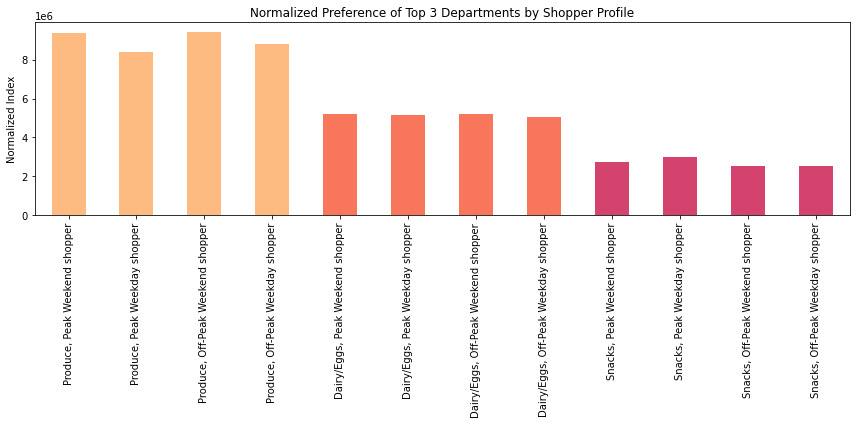

In [327]:
# Charting the normalized preferences of the top 3 departments across the four shopper profiles.
top3depts_shopper_bar = top3depts_shopper['normalized_counts'].plot.bar(title = 'Normalized Preference of Top 3 Departments by Shopper Profile', ylabel = 'Normalized Index', color = ['#febb81', '#febb81', '#febb81', '#febb81', '#f8765c', '#f8765c', '#f8765c', '#f8765c', '#d3436e', '#d3436e', '#d3436e', '#d3436e'])
top3depts_shopper_bar.set_xticklabels(['Produce, Peak Weekend shopper', 'Produce, Peak Weekday shopper', 'Produce, Off-Peak Weekend shopper', 'Produce, Off-Peak Weekday shopper', 'Dairy/Eggs, Peak Weekend shopper', 'Dairy/Eggs, Peak Weekday shopper', 'Dairy/Eggs, Off-Peak Weekend shopper', 'Dairy/Eggs, Off-Peak Weekday shopper', 'Snacks, Peak Weekend shopper', 'Snacks, Peak Weekday shopper', 'Snacks, Off-Peak Weekend shopper', 'Snacks, Off-Peak Weekday shopper'])
plt.tight_layout()

Weekday shoppers tend to buy more produce! Also, Peak Weekday shoppers buy more snacks.

In [328]:
# Exporting top3depts_shopper_bar
top3depts_shopper_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'top3depts_shopper_bar.png'))

In [329]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,loyalty_flag,spending_flag,frequency_flag,Gender,State,Age,date_joined,n_dependants,fam_status,income,max_order,Region,income_range,customer_profile,peak_flag,day_flag,shopper_profile,order_expenditure
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77.0,7.0,9.0,Mid-range product,Regularly busy,Average orders,New customer,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,10,South,Low income,Married Parent,Peak shopper,Weekend shopper,Peak Weekend shopper,31.6
1,2539329,1,1,2,8,NaN,True,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,12.5,Mid-range product,Regularly busy,Average orders,New customer,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,10,South,Low income,Married Parent,Peak shopper,Weekend shopper,Peak Weekend shopper,31.6
2,2539329,1,1,2,8,NaN,True,12427,3,0,Original Beef Jerky,23.0,19.0,4.4,Low-range product,Regularly busy,Average orders,New customer,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,10,South,Low income,Married Parent,Peak shopper,Weekend shopper,Peak Weekend shopper,31.6
3,2539329,1,1,2,8,NaN,True,26088,4,0,Aged White Cheddar Popcorn,23.0,19.0,4.7,Low-range product,Regularly busy,Average orders,New customer,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,10,South,Low income,Married Parent,Peak shopper,Weekend shopper,Peak Weekend shopper,31.6
4,2539329,1,1,2,8,NaN,True,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,1.0,Low-range product,Regularly busy,Average orders,New customer,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,10,South,Low income,Married Parent,Peak shopper,Weekend shopper,Peak Weekend shopper,31.6


In [330]:
# Exporting final dataframe v3
df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_dataframe_v3.pkl'))